In [1]:
import numpy as np
import glob
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

data_1 = pd.read_csv('community_dataset.csv')
data_1

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

по Ох будут типы клеток, по Оу — их количество. Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной. 

In [2]:
count_community_1=data_1.loc[data_1['cell_interaction'] == 'community_1']
count_community_1

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
13,833.845631,818.200092,8.280475,179.001408,community_1,Stroma cells,891,117,elder_group
16,604.038507,628.217718,6.500649,109.674344,community_1,Stroma cells,891,261,elder_group
17,677.621315,738.981859,12.776360,151.196441,community_1,Stroma cells,891,176,elder_group
...,...,...,...,...,...,...,...,...,...
269386,1074.580958,721.704076,4.772382,24.860308,community_1,Stroma cells,983,243,young_group
269396,928.318246,712.873442,10.110185,79.698735,community_1,Stroma cells,983,240,young_group
269399,916.562408,942.933560,8.369391,34.282472,community_1,Immune type 2,983,268,young_group
269411,1105.756238,604.533705,12.235670,13.722748,community_1,Immune type 2,983,413,young_group


<AxesSubplot: xlabel='cell_type'>

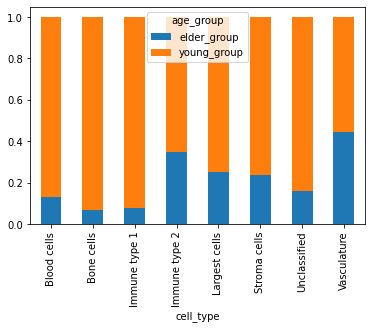

In [4]:
count_community_1.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [8]:
count_community_2=data_1.loc[data_1['cell_interaction'] == 'community_2']
count_community_2
# количество community_2 = 51482

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
6,928.607245,707.710208,21.251381,201.072243,community_2,Stroma cells,891,238,elder_group
14,638.870269,776.426233,17.495790,157.435209,community_2,Stroma cells,891,323,elder_group
19,773.075193,818.785490,63.921637,581.377876,community_2,Stroma cells,891,251,elder_group
20,611.905694,1011.755653,10.672844,184.366908,community_2,Stroma cells,891,250,elder_group
...,...,...,...,...,...,...,...,...,...
269407,1124.831233,717.195392,3.907588,15.896430,community_2,Unclassified,983,189,young_group
269423,885.378417,1020.769712,8.216864,39.660317,community_2,Stroma cells,983,188,young_group
269426,1105.711950,738.742091,8.581935,27.305725,community_2,Stroma cells,983,322,young_group
269428,703.086495,840.464294,18.283574,67.645920,community_2,Stroma cells,983,163,young_group


<AxesSubplot: xlabel='cell_type'>

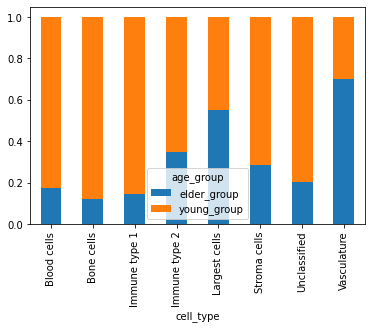

In [9]:
count_community_2.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [11]:
count_community_3=data_1.loc[data_1['cell_interaction'] == 'community_3']
count_community_3

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
5,812.104009,845.400332,17.557133,172.700050,community_3,Unclassified,891,196,elder_group
9,810.869444,687.209613,16.600478,210.507683,community_3,Unclassified,891,140,elder_group
10,766.624118,699.938237,22.002075,229.014747,community_3,Unclassified,891,170,elder_group
...,...,...,...,...,...,...,...,...,...
269269,597.053088,745.045629,11.576168,69.988694,community_3,Stroma cells,983,338,young_group
269336,1015.353830,692.861146,3.610554,10.444451,community_3,Unclassified,983,201,young_group
269356,1063.618275,675.297588,8.839145,60.005738,community_3,Unclassified,983,188,young_group
269412,933.366096,1061.980943,4.625777,13.900044,community_3,Unclassified,983,140,young_group


<AxesSubplot: xlabel='cell_type'>

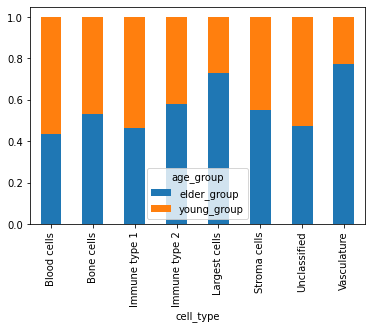

In [12]:
count_community_3.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [13]:
count_community_4=data_1.loc[data_1['cell_interaction'] == 'community_4']
count_community_4
# количество community_4 = 80969

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
7,663.260477,743.314465,16.802267,123.042648,community_4,Stroma cells,891,254,elder_group
8,715.872214,706.074967,10.135094,108.936363,community_4,Stroma cells,891,331,elder_group
23,697.515974,747.289438,19.083657,171.974201,community_4,Stroma cells,891,135,elder_group
25,681.372289,720.789007,10.663821,189.053994,community_4,Stroma cells,891,368,elder_group
56,647.795699,646.528438,10.544203,216.723971,community_4,Stroma cells,891,450,elder_group
...,...,...,...,...,...,...,...,...,...
269434,796.544007,1017.561182,3.896588,30.709678,community_4,Stroma cells,983,195,young_group
269435,675.439430,963.328712,7.037208,27.434407,community_4,Stroma cells,983,525,young_group
269436,756.724495,621.686459,8.249116,23.699652,community_4,Stroma cells,983,279,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


<AxesSubplot: xlabel='cell_type'>

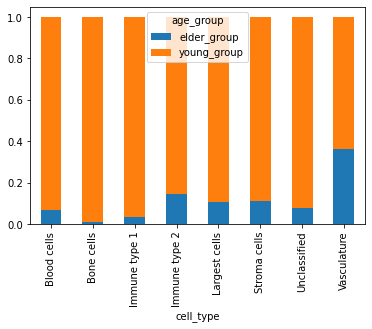

In [14]:
count_community_4.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [15]:
count_community_5=data_1.loc[data_1['cell_interaction'] == 'community_5']
count_community_5

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
18,648.292289,642.474936,19.886705,112.498234,community_5,Stroma cells,891,210,elder_group
24,664.164388,693.815542,14.175209,172.635499,community_5,Stroma cells,891,309,elder_group
40,737.297096,732.813454,13.601498,286.372754,community_5,Stroma cells,891,330,elder_group
43,681.351763,642.168888,9.631409,134.772915,community_5,Unclassified,891,233,elder_group
45,638.705859,822.289349,9.442239,119.558352,community_5,Unclassified,891,204,elder_group
...,...,...,...,...,...,...,...,...,...
269309,1053.885447,616.017277,15.864921,20.206692,community_5,Unclassified,983,237,young_group
269322,734.641646,759.437038,26.121501,38.228953,community_5,Unclassified,983,190,young_group
269334,737.215462,1012.773807,14.186660,111.787329,community_5,Unclassified,983,105,young_group
269338,686.360034,811.660717,8.014409,35.235228,community_5,Unclassified,983,536,young_group


<AxesSubplot: xlabel='cell_type'>

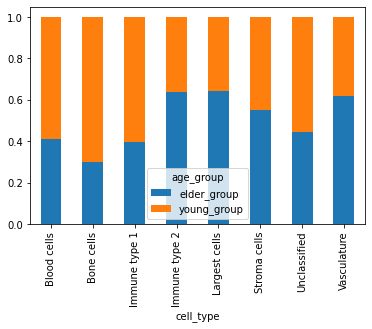

In [16]:
count_community_5.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [17]:
count_community_6=data_1.loc[data_1['cell_interaction'] == 'community_6']
count_community_6

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
52,871.129145,609.949327,15.438529,179.608425,community_6,Unclassified,891,81,elder_group
70,811.364784,827.572022,24.829346,188.200752,community_6,Stroma cells,891,145,elder_group
75,947.767468,616.670323,4.469803,150.787029,community_6,Stroma cells,891,241,elder_group
82,711.652056,602.970394,9.238120,150.456298,community_6,Stroma cells,891,209,elder_group
83,659.995782,621.095335,16.436083,201.447674,community_6,Stroma cells,891,175,elder_group
...,...,...,...,...,...,...,...,...,...
269417,835.907589,645.505356,16.917086,41.510724,community_6,Stroma cells,983,216,young_group
269419,873.134215,772.784006,9.536660,38.280659,community_6,Stroma cells,983,223,young_group
269429,1186.013536,815.514952,7.690244,32.580612,community_6,Unclassified,983,166,young_group
269430,1113.365851,844.921588,6.912644,26.499099,community_6,Stroma cells,983,223,young_group


<AxesSubplot: xlabel='cell_type'>

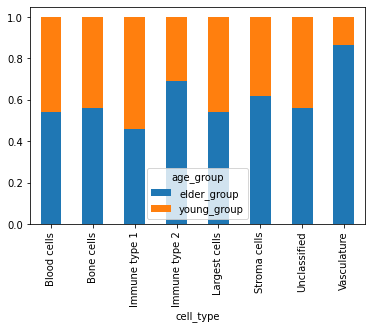

In [18]:
count_community_6.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

3) Есть ли разница в доле микроокружения в тканях пациентов разных возрастов? Для ответа используйте box_plot/swarplot с hue по возрастным группам, где:

по Ох будут микроокружения, по Оу — их доля в ткани пациента. Не забудьте посчитать доли для каждого пациента отдельно, иначе выборка не будет репрезентативной

<AxesSubplot: xlabel='cell_interaction'>

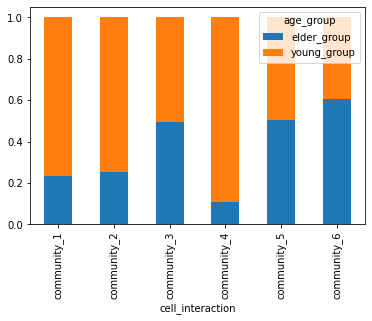

In [19]:
data_1.groupby(['cell_interaction'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

Задание 3

В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

по Ох будут типы клеток, по Оу — их количество. Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной. 

<AxesSubplot: xlabel='cell_type'>

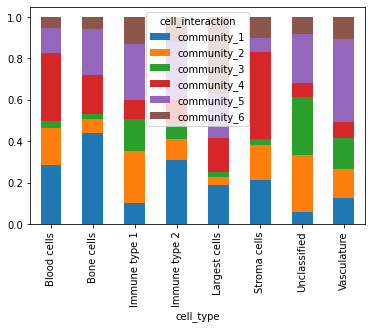

In [20]:
data_1.groupby(['cell_type'])['cell_interaction'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [ ]:
Задание 4

Правда ли, что иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов? Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

data_1 = pd.read_csv('community_dataset.csv')
data_1


,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


In [26]:
data_1.cell_type.value_counts()

Stroma cells     173192
Unclassified      66966
Immune type 2     16204
Immune type 1      5575
Blood cells        2818
Bone cells         2555
Largest cells      1988
Vasculature         144
Name: cell_type, dtype: int64

In [16]:
data_1.groupby('cell_type').agg({'distance_to_vasculature': 'count'})

,distance_to_vasculature
cell_type,
Blood cells,2818
Bone cells,2555
Immune type 1,5575
Immune type 2,16204
Largest cells,1988
Stroma cells,173192
Unclassified,66966
Vasculature,144


In [17]:
data_1.groupby('cell_type').agg({'distance_to_vasculature': 'mean'})

,distance_to_vasculature
cell_type,
Blood cells,974.268348
Bone cells,985.014241
Immune type 1,931.842702
Immune type 2,875.947219
Largest cells,897.199932
Stroma cells,938.841588
Unclassified,914.092616
Vasculature,576.569518


In [18]:
data_1.groupby('cell_type').agg({'distance_to_largest_cell': 'mean'})

,distance_to_largest_cell
cell_type,
Blood cells,766.868038
Bone cells,773.080667
Immune type 1,757.067652
Immune type 2,751.277087
Largest cells,576.490927
Stroma cells,766.324174
Unclassified,766.417659
Vasculature,773.567973


<AxesSubplot: xlabel='cell_type', ylabel='distance_to_vasculature'>

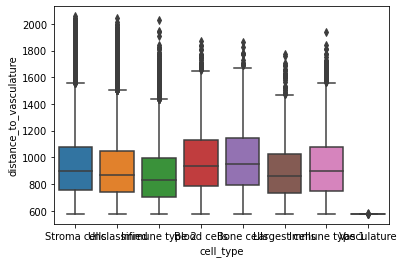

In [21]:
sns.boxplot(x="cell_type", y="distance_to_vasculature", data=data_1)

<AxesSubplot: xlabel='cell_type', ylabel='distance_to_largest_cell'>

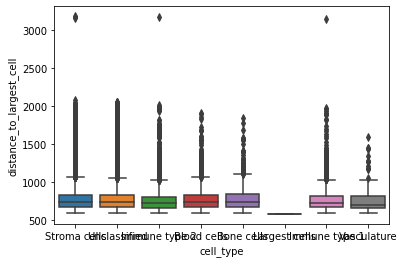

In [22]:
sns.boxplot(x="cell_type", y="distance_to_largest_cell", data=data_1)

<AxesSubplot: xlabel='distance_to_vasculature'>

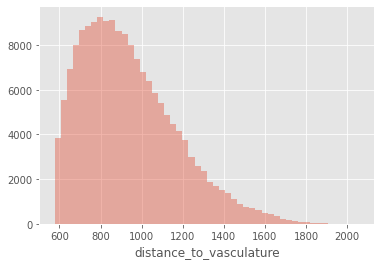

In [62]:
sns.distplot(data_1[data_1.cell_type == 'Stroma cells'].distance_to_vasculature, kde=False)

C:\Users\79024\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='distance_to_vasculature'>

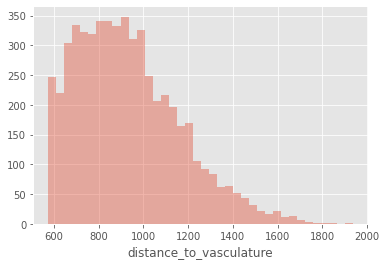

In [61]:
sns.distplot(data_1[data_1.cell_type == 'Immune type 1'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_vasculature'>

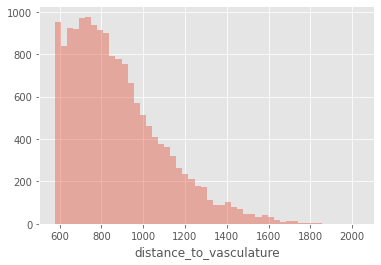

In [64]:
sns.distplot(data_1[data_1.cell_type == 'Immune type 2'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

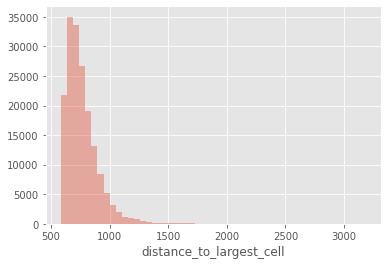

In [65]:
sns.distplot(data_1[data_1.cell_type == 'Stroma cells'].distance_to_largest_cell, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

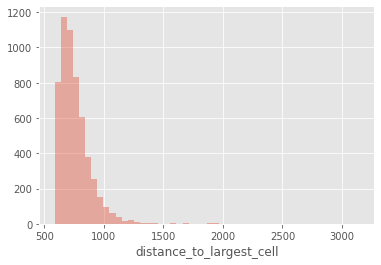

In [66]:
sns.distplot(data_1[data_1.cell_type == 'Immune type 1'].distance_to_largest_cell, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

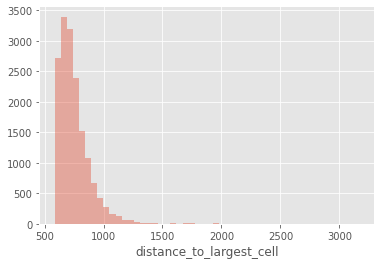

In [67]:
sns.distplot(data_1[data_1.cell_type == 'Immune type 2'].distance_to_largest_cell, kde=False)

In [38]:
ttest_ind(data_1[data_1.cell_type == 'Stroma cells'].distance_to_vasculature, 
             data_1[data_1.cell_type == 'Immune type 1'].distance_to_vasculature)

Ttest_indResult(statistic=2.2107504680090817, pvalue=0.02705438275179559)

In [39]:
ttest_ind(data_1[data_1.cell_type == 'Stroma cells'].distance_to_vasculature, 
             data_1[data_1.cell_type == 'Immune type 2'].distance_to_vasculature)

Ttest_indResult(statistic=33.019975258795704, pvalue=2.0099928194394973e-238)

In [40]:
ttest_ind(data_1[data_1.cell_type == 'Stroma cells'].distance_to_largest_cell, 
             data_1[data_1.cell_type == 'Immune type 1'].distance_to_largest_cell)

Ttest_indResult(statistic=4.776128802580969, pvalue=1.7884326113539797e-06)

In [41]:
ttest_ind(data_1[data_1.cell_type == 'Stroma cells'].distance_to_largest_cell, 
             data_1[data_1.cell_type == 'Immune type 2'].distance_to_largest_cell)

Ttest_indResult(statistic=12.890119264357088, pvalue=5.308562775209762e-38)

In [5]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

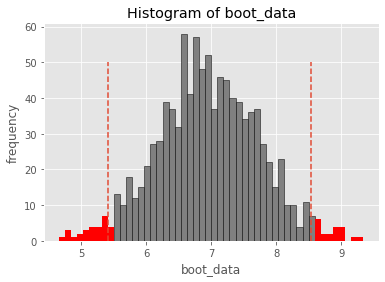

{'boot_data': [5.221128740180719,
  6.528865678960175,
  7.2276191288986285,
  6.866708718610682,
  8.062597563295443,
  5.191286947741874,
  7.266879224135362,
  7.204559899046651,
  7.636726727674272,
  8.035851550843288,
  6.377046001300876,
  6.942543757651218,
  7.052204252676743,
  7.127743635198631,
  5.552631268106348,
  6.5924175665857785,
  6.67421216555848,
  7.283355464850959,
  7.692552615395419,
  7.6303915277374745,
  6.799488436952623,
  6.62195409500261,
  7.494655527349938,
  7.638466987522142,
  6.840054175950947,
  7.5278714383169385,
  6.542980738647229,
  7.417280223000873,
  8.79687261649666,
  7.3574572169275365,
  6.368701077213645,
  6.550482940947205,
  8.830547663739338,
  6.97046390712885,
  5.699624694734738,
  6.906562848113323,
  6.27908082059414,
  6.287624482299411,
  7.506773563745128,
  6.515477800585748,
  6.617952611677195,
  6.242304020653264,
  7.4023620071643785,
  6.571486976026258,
  6.356209593539838,
  6.0798442826665,
  6.253136051468243,
 

In [10]:
get_bootstrap(
    data_1[data_1.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_1[data_1.cell_type == 'Immune type 1'].distance_to_vasculature, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/10000 [00:00<?, ?it/s]

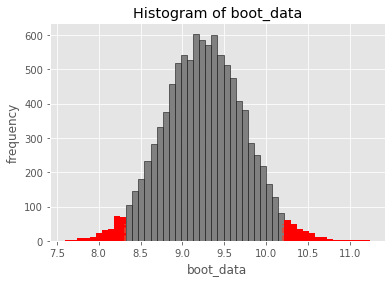

{'boot_data': [9.00498539888988,
  9.316047035855387,
  9.373850906259687,
  10.013550822774484,
  9.49302868591701,
  8.904922573176956,
  8.948545521252678,
  8.878316539454968,
  9.237559042076402,
  8.937971863819213,
  9.163404610580894,
  8.899071857569815,
  9.548638865313087,
  9.764420891268443,
  9.50700342052567,
  8.564158451613231,
  9.452215636413639,
  8.724615587704337,
  8.753723853195762,
  9.35619971488835,
  9.638430382425335,
  8.620202733693183,
  9.077400503141291,
  8.98502029650376,
  9.304083167831655,
  9.255380388951759,
  9.219982648320828,
  8.981611985311707,
  8.786282463606545,
  9.028578482166054,
  9.353417472953783,
  8.928922218141878,
  9.411290441948069,
  9.534559315367838,
  8.400823303786693,
  9.247453350024687,
  9.197155501376333,
  9.720358385547211,
  9.581184746039286,
  9.931307062636469,
  8.952386837694599,
  9.17816443899316,
  9.246836499766754,
  8.790325983028316,
  9.437880190507519,
  9.863159897372899,
  8.996569320538375,
  9.4

In [55]:
get_bootstrap(
    data_1[data_1.cell_type == 'Stroma cells'].distance_to_largest_cell, 
    data_1[data_1.cell_type == 'Immune type 1'].distance_to_largest_cell, 
    boot_it = 10000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

In [58]:
 9.061484970533469e-20<0.02705438275179559

True

In [1]:
3.3562797001235775e-82<1.7884326113539797e-06

True

  0%|          | 0/1000 [00:00<?, ?it/s]

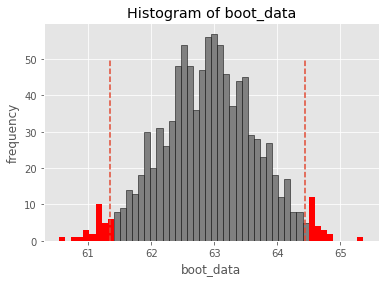

{'boot_data': [63.73103131534049,
  62.98019044399787,
  63.442683349110595,
  63.901235659523294,
  62.188857493190916,
  61.96824971094042,
  61.80495087869478,
  63.437857515652595,
  64.66536515815984,
  61.887987386290426,
  61.97919705929729,
  63.3708586783219,
  63.47367635622326,
  62.550239029522324,
  63.338949037163864,
  62.61761846874985,
  62.932406055225435,
  62.30732262159491,
  61.51303627994339,
  63.2993704877784,
  62.66246062565343,
  63.11367099527182,
  62.56501244866988,
  62.47179379032203,
  61.88719500957354,
  62.40618982220376,
  62.96970249486481,
  62.365241096405136,
  61.16696223084343,
  63.53436556725099,
  62.76428432122545,
  62.53457225487587,
  63.07353738300341,
  63.062072241618736,
  62.23386614251447,
  63.5464054286859,
  62.885734464539134,
  63.41781354263891,
  62.73044199611172,
  64.31101531742178,
  63.22731744313255,
  62.85562550365755,
  62.94311371852637,
  61.12542541947193,
  62.80156816038696,
  62.804792325089636,
  61.7127845

In [6]:
get_bootstrap(
    data_1[data_1.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_1[data_1.cell_type == 'Immune type 2'].distance_to_vasculature, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/1000 [00:00<?, ?it/s]

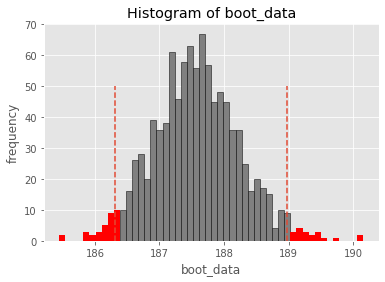

{'boot_data': [187.43116963662553,
  187.32999216646965,
  188.76617943813775,
  187.5270435823409,
  187.4367267115065,
  188.13111062898125,
  186.89509543502834,
  187.5307689276988,
  187.74145587963065,
  187.7597989261479,
  188.46960392038352,
  187.53013783241713,
  187.22544304772407,
  188.60197233889593,
  188.77429151516444,
  187.2473028969685,
  187.79586883229967,
  187.54661632549664,
  188.2066999453962,
  186.24870027292386,
  187.60355999903763,
  186.44978093913934,
  188.45303297196045,
  187.23390585640152,
  187.96950394551976,
  186.66084509300097,
  187.7857645972198,
  188.0823940465034,
  187.99275557838286,
  187.46434446113562,
  187.495124935205,
  187.69319845322602,
  187.6605870784583,
  187.81364442622905,
  187.36660308413818,
  187.60749061486356,
  188.12205981961606,
  186.40698861348238,
  187.4792502337305,
  188.3047780145158,
  187.90082002056587,
  187.56075414190113,
  187.77362308712497,
  187.944197890241,
  187.22162406407298,
  187.635647

In [7]:
get_bootstrap(
    data_1[data_1.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_1[data_1.cell_type == 'Immune type 2'].distance_to_largest_cell, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

In [8]:
0.0<2.0099928194394973e-238

True

In [9]:
0.0<5.308562775209762e-38

True

Вывод: иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells), без деления на возраст

In [ ]:
Задание 4. Правда ли, что иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам 
(Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов? 
Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

data_1 = pd.read_csv('community_dataset.csv')
data_1

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


In [12]:
data_1.age_group.value_counts()

young_group    188900
elder_group     80542
Name: age_group, dtype: int64

In [30]:
# Фильтрация столбца возраст на 2 возрастные группы
age_el = ['elder_group']
data_elder=data_1.loc[data_1['age_group'].isin(age_el)]
data_elder

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
...,...,...,...,...,...,...,...,...,...
264455,1173.599603,664.281005,16.897153,30.890528,community_4,Unclassified,566,189,elder_group
264456,685.852246,655.175160,11.893887,24.487760,community_2,Stroma cells,566,240,elder_group
264457,663.379860,645.536011,26.845390,51.286679,community_2,Stroma cells,566,203,elder_group
264458,991.858530,617.422598,16.450559,53.811336,community_2,Unclassified,566,155,elder_group


Анализ группы data_elder

In [31]:
data_elder.cell_type.value_counts()

Stroma cells     45784
Unclassified     23735
Immune type 2     7557
Immune type 1     1583
Largest cells      879
Blood cells        521
Bone cells         391
Vasculature         92
Name: cell_type, dtype: int64

In [35]:
data_elder.groupby('cell_type').agg({'distance_to_vasculature': 'mean'})

,distance_to_vasculature
cell_type,
Blood cells,836.958176
Bone cells,831.525807
Immune type 1,817.844810
Immune type 2,800.213120
Largest cells,828.905907
Stroma cells,830.807948
Unclassified,822.851933
Vasculature,576.583463


In [36]:
data_elder.groupby('cell_type').agg({'distance_to_largest_cell': 'mean'})

,distance_to_largest_cell
cell_type,
Blood cells,766.764053
Bone cells,765.855248
Immune type 1,760.573066
Immune type 2,736.503375
Largest cells,576.491693
Stroma cells,760.470815
Unclassified,752.900666
Vasculature,799.454448


<AxesSubplot: xlabel='distance_to_vasculature'>

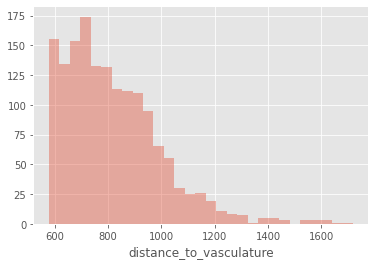

In [71]:
sns.distplot(data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_vasculature'>

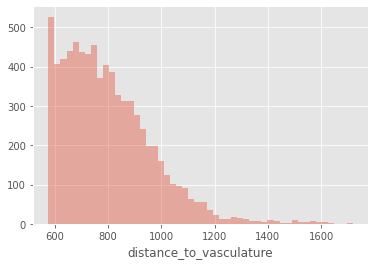

In [72]:
sns.distplot(data_elder[data_elder.cell_type == 'Immune type 2'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_vasculature'>

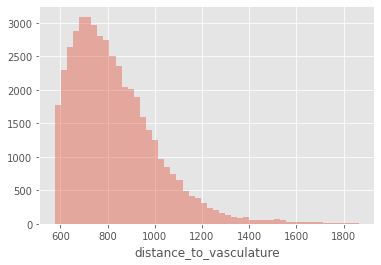

In [73]:
sns.distplot(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

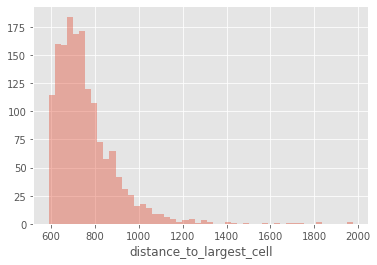

In [74]:
sns.distplot(data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_largest_cell, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

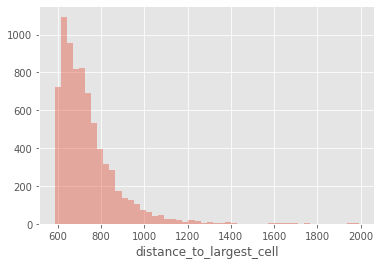

In [75]:
sns.distplot(data_elder[data_elder.cell_type == 'Immune type 2'].distance_to_largest_cell, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

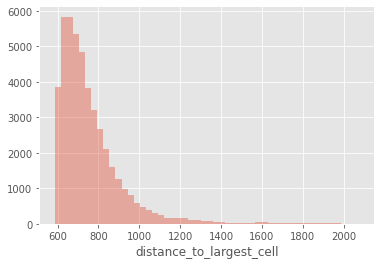

In [76]:
sns.distplot(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_largest_cell, kde=False)

ВСе распределения отличны от нормального неообходимо использовать критерий Манна -Уитни

In [77]:
mannwhitneyu(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_vasculature, 
             data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_vasculature)

MannwhitneyuResult(statistic=37800709.0, pvalue=0.0034825358984153496)

In [78]:
mannwhitneyu(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_vasculature, 
             data_elder[data_elder.cell_type == 'Immune type 2'].distance_to_vasculature)

MannwhitneyuResult(statistic=189587912.0, pvalue=7.931274396275806e-41)

In [79]:
mannwhitneyu(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_largest_cell, 
             data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_largest_cell)

MannwhitneyuResult(statistic=34736985.0, pvalue=0.005010196965827519)

In [80]:
mannwhitneyu(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_largest_cell, 
             data_elder[data_elder.cell_type == 'Immune type 2'].distance_to_largest_cell)

MannwhitneyuResult(statistic=186937644.0, pvalue=2.5129128927013243e-29)

Согласно теста Манна Уитни в старшей возрастной группе  между  Stroma cells и Immune type 1 и Immune type 2
есть достоверная разница расстояний distance_to_vasculature и distance_to_largest_cell 

In [41]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

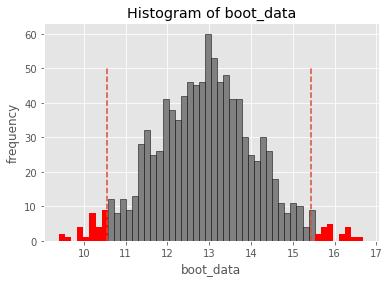

{'boot_data': [13.242805622151995,
  14.89143147188056,
  11.485808844957074,
  15.135572452178842,
  14.371076352722861,
  11.627852873595566,
  10.205708543666452,
  13.414235296171071,
  12.660955967436806,
  12.111677397706858,
  13.268075832015247,
  11.262089036371886,
  13.965428736331916,
  13.223110095569371,
  14.280529719029175,
  11.263071694420386,
  12.209428386775544,
  12.555330109527945,
  13.684329074159482,
  13.378586200191632,
  13.454680040794418,
  15.120373733366312,
  13.012056860864444,
  13.689611184055103,
  13.490256290017337,
  13.551294260317997,
  12.63233245660034,
  12.434709392237643,
  13.416959691050762,
  12.922792776936442,
  16.337245009338837,
  10.815968896390963,
  12.578450224254551,
  12.985720744451417,
  12.986718188699623,
  12.055464946684454,
  12.686787647936349,
  12.28229361924542,
  13.305094368264879,
  12.392167720208226,
  12.541008462111968,
  15.94695066135112,
  12.649177164638804,
  13.432829621883858,
  15.3181938855322,
  1

In [82]:
get_bootstrap(
    data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_vasculature, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/1000 [00:00<?, ?it/s]

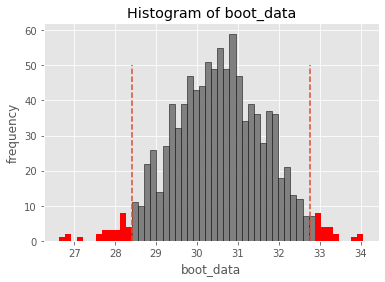

{'boot_data': [30.598295162065533,
  30.905847286310195,
  29.9687407099573,
  30.44126802666046,
  30.149582061781217,
  28.37879915529668,
  28.057684979155216,
  30.87772192603255,
  29.52300946570483,
  31.515666741972648,
  28.817104310284897,
  29.132197713387267,
  29.79816438474458,
  30.875159760763275,
  30.928638108428355,
  31.926655851018953,
  33.0493307347401,
  30.010978338377853,
  31.256015227989916,
  30.708616075350406,
  29.37387152928578,
  31.482998982303094,
  29.387384101646727,
  31.128808896798073,
  31.95836705490306,
  30.863364537450696,
  31.785800211498103,
  31.81623418756521,
  30.251605212054375,
  29.76484333654294,
  31.027065164856097,
  28.866807143833167,
  30.33009139981251,
  30.38127579817321,
  31.033777960843874,
  31.40677250285519,
  31.75773272771002,
  27.793698681968994,
  30.068363499048502,
  29.991521607876432,
  29.438458955976376,
  31.265794997527166,
  32.29437358586124,
  29.732041830967564,
  31.94368842226385,
  29.73708887452

In [84]:
get_bootstrap(
    data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_elder[data_elder.cell_type == 'Immune type 2'].distance_to_vasculature, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/1000 [00:00<?, ?it/s]

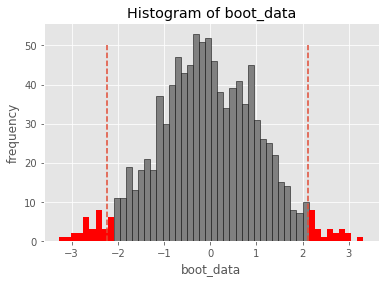

{'boot_data': [0.1476808156472904,
  0.38922177277134756,
  0.5991576727913023,
  -1.055684666772303,
  -0.5423609522480372,
  2.4427470717162674,
  0.6612350475302408,
  -0.14893421511257227,
  0.16223746240966275,
  -0.13603125182485787,
  0.05259544657961146,
  0.14726990784451102,
  -2.0699267678341244,
  -0.637580322085968,
  -0.32276383693594124,
  -0.855405258799827,
  0.4800150337624755,
  -2.1121755664892263,
  -1.976628993156708,
  1.0667280745277155,
  -0.6109743015190702,
  -0.05761312479962438,
  1.177824934815298,
  -0.8477789100186952,
  1.1090720170373323,
  -0.9148698413512921,
  0.22511199390917316,
  1.4242364640503118,
  0.9355768277425579,
  -0.7756941264729451,
  1.099782854169749,
  -1.439907693693316,
  -0.518260117537552,
  0.549545175357479,
  0.9403116724409678,
  -0.7978096213313505,
  -0.21433506605675393,
  -0.8609870092059521,
  0.14829255375393752,
  -0.45588733811196175,
  0.787415095292575,
  0.8595096701626113,
  -0.3463522204413259,
  0.1702528617391

In [85]:
get_bootstrap(
    data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_largest_cell, 
    data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_largest_cell, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/1000 [00:00<?, ?it/s]

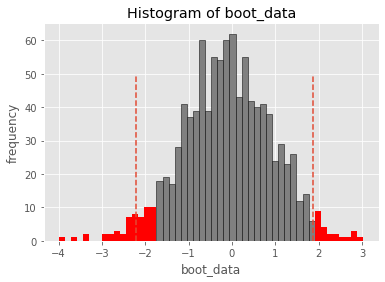

{'boot_data': [-1.314194822561643,
  -0.263723125162547,
  0.8304736118636312,
  -1.6053089114495096,
  -1.259862714513887,
  1.8110921662254007,
  1.0903204364612538,
  0.4727173107310682,
  2.0822436905979878,
  -0.635026987338819,
  -0.9896973681213129,
  1.0496071037965722,
  0.28901473295698865,
  0.7986098352379524,
  0.14382319242636632,
  -0.5832468599886698,
  0.7450979596833283,
  0.364575208878483,
  0.9761509121086761,
  -0.413111221563472,
  0.0065074708388916745,
  0.3926953671172056,
  1.7106483688861278,
  -2.1358726669932113,
  -0.013376801566243756,
  -0.5336605588494784,
  -1.8663063094700036,
  -1.1165817210134885,
  0.3672626158956436,
  -1.8924243193249803,
  0.4285128109010506,
  -0.5235411510520173,
  -1.5567796145551498,
  -0.6815054850139093,
  0.41125537328178846,
  -0.7359048691402204,
  -1.5657849959331378,
  -2.793300764332337,
  -0.6241004282160008,
  -1.8344850627626197,
  -0.03500232430744952,
  0.45328432952616965,
  0.10054980423077572,
  -0.525477253

In [86]:
get_bootstrap(
    data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_largest_cell, 
    data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_largest_cell, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

In [ ]:
Согласно буттстраппингу в  старшей возрастной группе имеется достоверная разница расстояния distance_to_vasculature от 
Stroma cells до  Immune type 1  95%ДИ 10.549953;  15.422472,p_value= 1.863566785290564e-26
Stroma cells до  Immune type 2   95% ДИ 28.404208;32.752851,p_value=2.3802862097100526e-158

для distance_to_largest_cell в старшей возрастной группе нет достоверной разницы 
Stroma cells до  Immune type 1  95%ДИ -2.237871; 2.113639, p_value= 0.9627314461696499
Stroma cells до  Immune type 2   95% ДИ -2.216168; 1.872341, p_value= 0.9170145277914186


In [ ]:
Анализ группы data_young

In [87]:
age_yo = ['young_group']
data_young=data_1.loc[data_1['age_group'].isin(age_yo)]
data_young

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
315,634.200203,983.403426,26.426694,133.223933,community_2,Stroma cells,199,261,young_group
316,610.444296,1000.488024,22.419208,49.971129,community_2,Immune type 2,199,142,young_group
317,782.995484,787.660055,36.285363,42.974851,community_5,Stroma cells,199,344,young_group
318,811.000834,608.351406,19.874799,34.869501,community_1,Stroma cells,199,170,young_group
319,704.830780,883.960378,35.305848,31.188793,community_3,Immune type 1,199,224,young_group
...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


In [46]:
data_young.cell_type.value_counts()

Stroma cells     127408
Unclassified      43231
Immune type 2      8647
Immune type 1      3992
Blood cells        2297
Bone cells         2164
Largest cells      1109
Vasculature          52
Name: cell_type, dtype: int64

In [47]:
data_young.groupby('cell_type').agg({'distance_to_vasculature': 'mean'})

,distance_to_vasculature
cell_type,
Blood cells,1005.412710
Bone cells,1012.747132
Immune type 1,977.047778
Immune type 2,942.134636
Largest cells,951.330183
Stroma cells,977.663422
Unclassified,964.186244
Vasculature,576.544846


In [48]:
data_young.groupby('cell_type').agg({'distance_to_largest_cell': 'mean'})

,distance_to_largest_cell
cell_type,
Blood cells,766.891623
Bone cells,774.386183
Immune type 1,755.677605
Immune type 2,764.188496
Largest cells,576.490319
Stroma cells,768.427575
Unclassified,773.838858
Vasculature,727.768825


In [49]:
ttest_ind(data_young[data_young.cell_type == 'Stroma cells'].distance_to_vasculature, 
             data_young[data_young.cell_type == 'Immune type 1'].distance_to_vasculature)

Ttest_indResult(statistic=0.162157912276216, pvalue=0.8711817515497493)

In [50]:
ttest_ind(data_young[data_young.cell_type == 'Stroma cells'].distance_to_vasculature, 
             data_young[data_young.cell_type == 'Immune type 2'].distance_to_vasculature)

Ttest_indResult(statistic=13.505816471397617, pvalue=1.5370742882728262e-41)

  0%|          | 0/1000 [00:00<?, ?it/s]

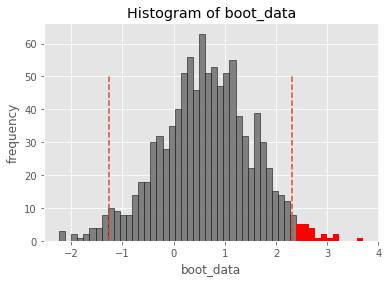

{'boot_data': [-0.29751950925750864,
  1.3164107816290538,
  1.0005117732924478,
  -0.7692886580467492,
  0.7647691308116765,
  -0.9891353804390247,
  2.2373151759469767,
  1.364808086510105,
  0.8158812277550931,
  -0.2921157966768053,
  -0.16004216687293263,
  0.6380138179117223,
  0.29797221493561077,
  0.4907986281505464,
  0.14428131769825653,
  0.3126206309704493,
  0.4707380133914827,
  0.07746711322577873,
  1.4552983945128586,
  0.3673666233227023,
  1.0554574963292827,
  0.3004174666906924,
  1.0928092945339773,
  0.6642985085817781,
  0.7619653410035164,
  1.321829755890187,
  0.031004466799745792,
  -0.06997056529959415,
  -0.42934619766208193,
  0.8019931242013703,
  2.0773676749151346,
  -0.6129502380416116,
  0.2193592276179309,
  0.8290062171608256,
  1.278972602949904,
  0.5199104548696387,
  1.2487485744598474,
  1.0177259440897475,
  0.6154258358737296,
  -1.3524550759391838,
  2.8742738731976436,
  1.3004965607268,
  1.6317335917806381,
  0.8862901823813921,
  0.743

In [51]:
get_bootstrap(
    data_young[data_young.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_young[data_young.cell_type == 'Immune type 1'].distance_to_vasculature, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

In [58]:
0.48392540696973796<0.8711817515497493

True

  0%|          | 0/1000 [00:00<?, ?it/s]

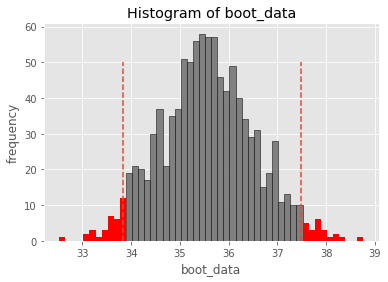

{'boot_data': [35.370659520251245,
  34.23677865332344,
  35.17180668421714,
  35.95898432649266,
  33.949142729662334,
  34.888523746033854,
  34.46543219442626,
  36.081883945302096,
  36.40753560957614,
  35.17490170227856,
  35.39906194289121,
  34.77757701824902,
  35.95998342359649,
  35.83093831251687,
  33.46835148516925,
  36.750732451230874,
  34.321866024934515,
  36.54213066968012,
  36.98024898890845,
  35.733104295221125,
  34.47801191375818,
  33.89880007985224,
  34.54641702472655,
  34.8131630357787,
  35.95484957655141,
  35.758238214176174,
  35.71593550928458,
  33.91187029924433,
  34.62308304712295,
  36.541306133167545,
  35.86493796746602,
  34.10469017500019,
  35.51585102464675,
  36.39461206378633,
  33.924817680133785,
  35.10410340900129,
  36.3049429447238,
  36.97329093447545,
  36.551629350021976,
  36.218027983174416,
  36.493488759571555,
  34.25093297524745,
  33.94347727731746,
  35.210038261846364,
  35.688189158904684,
  36.86968851047424,
  35.629

In [53]:
get_bootstrap(
    data_young[data_young.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_young[data_young.cell_type == 'Immune type 2'].distance_to_vasculature, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

In [59]:
2.8510462226060696e-305<1.5370742882728262e-41

True

Вывод: в группе data_young по результатам ttest 
нет достоверной разницы между Stroma cells и Immune type 1 (pvalue=0.005), по результатам бутстраппинга - разницы нет 

 нет  достоверной разницы между Stroma cells и Immune type 2 
  , по результатам бутстраппинга  - разницы нет
 